In [9]:
import pandas as pd
import os
from dotenv import load_dotenv
import boto3
from pathlib import Path

In [10]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [11]:
load_dotenv(r"C:\Users\esacz\Desktop\od_zera_do_ai\moduł_9\praca_domowa\.env", override=True)

s3 = boto3.client("s3")

BUCKET_NAME = "zaddom9"

files = [
    r"C:\Users\esacz\Desktop\od_zera_do_ai\moduł_9\praca_domowa\halfmarathon_wroclaw_2023__final (1).csv",
    r"C:\Users\esacz\Desktop\od_zera_do_ai\moduł_9\praca_domowa\halfmarathon_wroclaw_2024__final (3).csv"
]

for file_path in files:
    filename = Path(file_path).name
    key = f"stocks/{filename}"
    s3.upload_file(file_path, BUCKET_NAME, key)   
    print(f"✅ Wysłano {filename} do {BUCKET_NAME}/{key}")

✅ Wysłano halfmarathon_wroclaw_2023__final (1).csv do zaddom9/stocks/halfmarathon_wroclaw_2023__final (1).csv
✅ Wysłano halfmarathon_wroclaw_2024__final (3).csv do zaddom9/stocks/halfmarathon_wroclaw_2024__final (3).csv


In [12]:
# !pip install --quiet itables fsspec s3fs

In [13]:
# %pip install -U --upgrade-strategy eager "boto3>=1.40,<1.41" "botocore>=1.40,<1.41" s3fs fsspec itables

In [14]:
# !pip install --quiet "pandas==2.1.4" "numpy==1.26.4" "scipy==1.11.4" "scikit-learn==1.4.2" "imbalanced-learn==0.14.0"
# jeśli trzeba:
# !pip install --quiet "pycaret==3.3.2"


In [15]:
BUCKET_NAME = "zaddom9"
PREFIX = "stocks/"

data = []

# pobieramy listę obiektów w "stocks/"
resp = s3.list_objects_v2(Bucket=BUCKET_NAME, Prefix=PREFIX)

# jeśli coś jest w folderze
if "Contents" in resp:
    for obj in resp["Contents"]:
        key = obj["Key"]
        if key.endswith("/"):   # pomijamy ewentualne "puste katalogi"
            continue
        
        # wczytujemy CSV prosto z DO do DataFrame
        df = pd.read_csv(f"s3://{BUCKET_NAME}/{key}", sep=";")

        if "2023" in key:
            df["year"] = 2023
        elif "2024" in key:
            df["year"] = 2024
        else:
            df["year"] = None   # fallback, gdyby nie znaleziono

        data.append(df)

# łączymy wszystko w jeden DataFrame
df_all = pd.concat(data, ignore_index=True)

print("✅ Połączone dane:", df_all.shape)
display(df_all.head())

✅ Połączone dane: (21957, 28)


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [16]:
print(len(df_all.columns))
print(df_all.columns.tolist())


28
['Miejsce', 'Numer startowy', 'Imię', 'Nazwisko', 'Miasto', 'Kraj', 'Drużyna', 'Płeć', 'Płeć Miejsce', 'Kategoria wiekowa', 'Kategoria wiekowa Miejsce', 'Rocznik', '5 km Czas', '5 km Miejsce Open', '5 km Tempo', '10 km Czas', '10 km Miejsce Open', '10 km Tempo', '15 km Czas', '15 km Miejsce Open', '15 km Tempo', '20 km Czas', '20 km Miejsce Open', '20 km Tempo', 'Tempo Stabilność', 'Czas', 'Tempo', 'year']


In [17]:
df_all.columns = [
    "miejsce", "numer_startowy", "imie", "nazwisko", "miasto", "kraj", "druzyna", "plec", "plec_miejsce",
    "kategoria_wiekowa", "kategoria_wiekowa_miejsce", "rocznik",
    "5km_czas", "5km_miejsce_open", "5km_tempo",
    "10km_czas", "10km_miejsce_open", "10km_tempo",
    "15km_czas", "15km_miejsce_open", "15km_tempo",
    "20km_czas", "20km_miejsce_open", "20km_tempo",
    "tempo_stabilnosc", "czas", "tempo", "year"
]
display(df_all.head())

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21957 entries, 0 to 21956
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   miejsce                    18450 non-null  float64
 1   numer_startowy             21957 non-null  int64  
 2   imie                       21957 non-null  object 
 3   nazwisko                   21957 non-null  object 
 4   miasto                     17774 non-null  object 
 5   kraj                       18450 non-null  object 
 6   druzyna                    8402 non-null   object 
 7   plec                       21946 non-null  object 
 8   plec_miejsce               18450 non-null  float64
 9   kategoria_wiekowa          21926 non-null  object 
 10  kategoria_wiekowa_miejsce  18430 non-null  float64
 11  rocznik                    21472 non-null  float64
 12  5km_czas                   18411 non-null  object 
 13  5km_miejsce_open           18411 non-null  flo

In [19]:
time_cols = ["5km_czas", "10km_czas", "15km_czas", "20km_czas", "czas"]

for col in time_cols:
    df_all[col] = pd.to_timedelta(df_all[col], errors="coerce").dt.total_seconds()

df_all.head()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [20]:
df_all.isna().sum()

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [21]:
df_all.isna().sum()/len(df_all)*100

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [22]:
# sprzawdzam czy dla brak danych w tempo związany jest z innymi brakującymi danymi
df_all[df_all["tempo"].isna()]

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [23]:
# usuwam wiersze z brakującym tempem ponieważ są to zawodnicy którzy nie ukończyli biegu
df_finishers = df_all[df_all["tempo"].notna()]

In [24]:
df_finishers["start_druzynowy"] = df_finishers["druzyna"].notna().map({True: "tak", False: "nie"})

df_finishers.head()

C:\Users\esacz\AppData\Local\Temp\ipykernel_4908\1666270958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finishers["start_druzynowy"] = df_finishers["druzyna"].notna().map({True: "tak", False: "nie"})


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [25]:
# upewnij się, że kolumny są liczbami całkowitymi
df_finishers["rocznik"] = pd.to_numeric(df_finishers["rocznik"], errors="coerce").astype("Int64")
df_finishers["year"]    = pd.to_numeric(df_finishers["year"],    errors="coerce").astype("Int64")

# wiek = rok biegu - rocznik
df_finishers["wiek"] = (df_finishers["year"] - df_finishers["rocznik"]).astype("Int64")

df_finishers.head(100)

C:\Users\esacz\AppData\Local\Temp\ipykernel_4908\3093314361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finishers["rocznik"] = pd.to_numeric(df_finishers["rocznik"], errors="coerce").astype("Int64")
C:\Users\esacz\AppData\Local\Temp\ipykernel_4908\3093314361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finishers["year"]    = pd.to_numeric(df_finishers["year"],    errors="coerce").astype("Int64")
C:\Users\esacz\AppData\Local\Temp\ipykernel_4908\3093314361.py:6: SettingWithCopyWarning: 
A

Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


In [26]:
from pycaret.regression import setup, create_model, compare_models, finalize_model, plot_model, save_model

In [27]:
# !pip install pycaret --quiet

In [28]:
from pycaret.regression import setup, create_model, compare_models, finalize_model, plot_model, save_model

In [29]:
init_notebook_mode(all_interactive=False)

In [30]:
df_model = df_finishers[["wiek", "plec", "start_druzynowy", "5km_tempo", "czas"]]

exp = setup(
    data=df_model,
    target='czas',
    session_id=123,
)

,Description,Value
0,Session id,123
1,Target,czas
2,Target type,Regression
3,Original data shape,"(18450, 5)"
4,Transformed data shape,"(18450, 5)"
5,Transformed train set shape,"(12915, 5)"
6,Transformed test set shape,"(5535, 5)"
7,Numeric features,2
8,Categorical features,2
9,Rows with missing values,2.8%


In [31]:
exp.dataset_transformed

,wiek,plec,start_druzynowy,5km_tempo,czas
4077,49.0,0.0,1.0,5.510000,7202.0
7898,35.0,0.0,0.0,7.793334,9905.0
16267,22.0,1.0,1.0,6.430000,8036.0
15191,47.0,0.0,0.0,5.723333,7663.0
16036,40.0,0.0,1.0,6.110000,7943.0
...,...,...,...,...,...
8029,30.0,0.0,0.0,7.120000,10384.0
13517,25.0,1.0,0.0,5.686666,7162.0
12656,36.0,1.0,1.0,5.283333,6949.0
9064,38.0,1.0,1.0,3.933333,5096.0


In [32]:
best_model = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,301.8023,179105.6885,422.8287,0.8793,0.0534,0.0393,0.1920
lightgbm,Light Gradient Boosting Machine,305.6321,183667.6193,428.1885,0.8763,0.0540,0.0398,0.1740
llar,Lasso Least Angle Regression,305.6621,194014.1588,440.1386,0.8691,0.0588,0.0398,0.0200
lasso,Lasso Regression,305.6621,194014.1014,440.1386,0.8691,0.0588,0.0398,0.0210
lr,Linear Regression,305.6263,194063.1158,440.1896,0.8690,0.0587,0.0398,1.7830
ridge,Ridge Regression,305.6327,194063.0291,440.1897,0.8690,0.0587,0.0398,0.0230
lar,Least Angle Regression,305.6263,194063.1158,440.1896,0.8690,0.0587,0.0398,0.0250
br,Bayesian Ridge,305.6289,194063.1259,440.1897,0.8690,0.0587,0.0398,0.0250
huber,Huber Regressor,300.9753,196215.3680,442.6548,0.8676,0.0590,0.0389,0.0410
rf,Random Forest Regressor,333.4345,214371.1546,462.7379,0.8555,0.0588,0.0437,0.7940


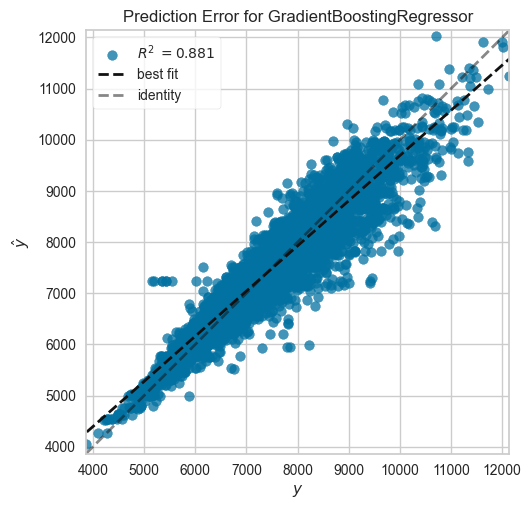

In [33]:
plot_model(best_model, plot='error')

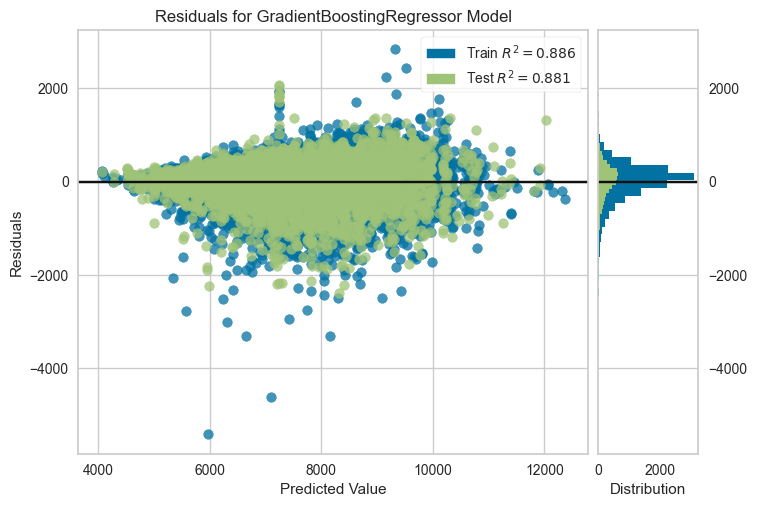

In [34]:
plot_model(best_model, plot='residuals')

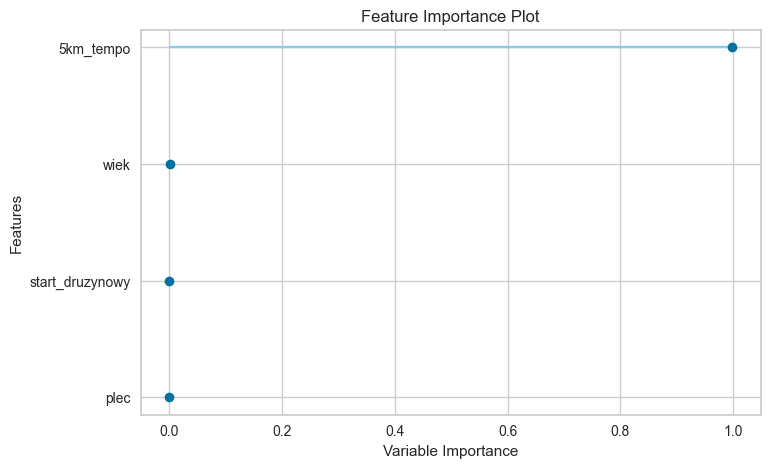

In [35]:
plot_model(best_model, plot='feature')

In [36]:
final_model = finalize_model(best_model)
save_model(final_model, 'czas_polmaratonu_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['wiek', '5km_tempo'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['plec', 'start_druzynowy'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['plec', 'start_druzynowy'],
                                     transformer=OrdinalEncoder(cols=['plec',
                                                                      'start_druzynowy'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'plec',
                                                                          'data_type': dtype('O'),
                 

In [37]:
s3.upload_file(
    "2025-09-24_czas_polmaratonu_regression_pipeline.pkl",
    "zaddom9",
    "models/2025-09-24/2025-09-24_czas_polmaratonu_regression_pipeline.pkl"
)

In [38]:
import json

with open("latest.json", "w") as f:
    json.dump({"path": "models/2025-09-24"}, f)

s3.upload_file("latest.json", "zaddom9", "models/latest.json")

In [39]:
import boto3, json, joblib, io

s3 = boto3.client("s3")

obj = s3.get_object(Bucket="zaddom9", Key="models/latest.json")
latest = json.loads(obj["Body"].read().decode())
print("LATEST wskazuje na:", latest)

path = latest["path"] + "/2025-09-24_czas_polmaratonu_regression_pipeline.pkl"
obj = s3.get_object(Bucket="zaddom9", Key=path)
model = joblib.load(io.BytesIO(obj["Body"].read()))

print("✔️ Model załadowany:", type(model))

LATEST wskazuje na: {'path': 'models/2025-09-24'}
✔️ Model załadowany: <class 'pycaret.internal.pipeline.Pipeline'>
